# **Time Series Forecasting with ARIMA**
### **ARIMA: Autoregressive Integrated Moving Averages**

Steps of ARIMA models:

* Visualizing/Plotting the Time Series Data
* Checking if the time series data is stationary or not
    * If not, then make it stationary
* Plotting the Correlation and AutoCorrelation Charts
* Constructing the ARIMA Model based on the data
* Evaluating the predictions

## **Problem Statement:**
* Temperature Forecasting (Time Series Data Analysis with ARIMA Model)
* Dataset: https://www.kaggle.com/datasets/akritiupadhyayks/maunaloadailytemps-dataset

In [130]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
# Ignore harmless warnings
import warnings
warnings.filterwarnings("ignore")

In [131]:
from google.colab import files
files.upload()

Saving MaunaLoaDailyTemps.csv to MaunaLoaDailyTemps (1).csv


{'MaunaLoaDailyTemps (1).csv': b'DATE,MinTemp,MaxTemp,AvgTemp,Sunrise,Sunset\n1/1/2014,33,46,40,657,1756\n1/2/2014,35,50,43,657,1756\n1/3/2014,36,45,41,657,1757\n1/4/2014,32,41,37,658,1757\n1/5/2014,24,38,31,658,1758\n1/6/2014,22,39,31,658,1759\n1/7/2014,28,45,37,658,1759\n1/8/2014,30,41,36,659,1800\n1/9/2014,29,42,36,659,1801\n1/10/2014,30,47,39,659,1801\n1/11/2014,32,47,40,659,1802\n1/12/2014,30,47,39,659,1803\n1/13/2014,29,42,36,659,1803\n1/14/2014,31,47,39,659,1804\n1/15/2014,35,51,43,659,1804\n1/16/2014,35,55,45,700,1805\n1/17/2014,42,57,50,700,1806\n1/18/2014,38,54,46,700,1806\n1/19/2014,37,51,44,700,1807\n1/20/2014,36,53,45,659,1808\n1/21/2014,40,55,48,659,1808\n1/22/2014,31,44,38,659,1809\n1/23/2014,31,46,39,659,1810\n1/24/2014,39,54,47,659,1810\n1/25/2014,41,62,52,659,1811\n1/26/2014,42,58,50,659,1811\n1/27/2014,38,51,45,659,1812\n1/28/2014,29,39,34,658,1813\n1/29/2014,30,36,33,658,1813\n1/30/2014,28,39,34,658,1814\n1/31/2014,33,42,38,658,1814\n2/1/2014,35,50,43,657,1815\n2/2/

In [132]:
df=pd.read_csv('MaunaLoaDailyTemps.csv')

In [133]:
df.head()

,DATE,MinTemp,MaxTemp,AvgTemp,Sunrise,Sunset
0,1/1/2014,33.0,46.0,40.0,657,1756
1,1/2/2014,35.0,50.0,43.0,657,1756
2,1/3/2014,36.0,45.0,41.0,657,1757
3,1/4/2014,32.0,41.0,37.0,658,1757
4,1/5/2014,24.0,38.0,31.0,658,1758


In [134]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1825 entries, 0 to 1824
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   DATE     1825 non-null   object 
 1   MinTemp  1821 non-null   float64
 2   MaxTemp  1821 non-null   float64
 3   AvgTemp  1821 non-null   float64
 4   Sunrise  1825 non-null   int64  
 5   Sunset   1825 non-null   int64  
dtypes: float64(3), int64(2), object(1)
memory usage: 85.7+ KB


# **EDA**

### **Handling Missing Value**

In [135]:
df.isnull().sum()

DATE       0
MinTemp    4
MaxTemp    4
AvgTemp    4
Sunrise    0
Sunset     0
dtype: int64

In [136]:
df.dropna(inplace = True)

In [137]:
df.isnull().sum()

DATE       0
MinTemp    0
MaxTemp    0
AvgTemp    0
Sunrise    0
Sunset     0
dtype: int64

In [138]:
df.shape

(1821, 6)

In [139]:
df.describe()

,MinTemp,MaxTemp,AvgTemp,Sunrise,Sunset
count,1821.000000,1821.000000,1821.000000,1821.000000,1821.000000
mean,38.637013,54.515102,46.818781,607.108731,1823.003844
std,3.798284,5.013654,4.143192,40.815966,49.576486
min,22.000000,36.000000,31.000000,543.000000,1742.000000
25%,36.000000,52.000000,44.000000,557.000000,1802.000000
50%,39.000000,55.000000,47.000000,614.000000,1831.000000
75%,41.000000,58.000000,50.000000,640.000000,1851.000000
max,49.000000,67.000000,57.000000,700.000000,1905.000000


### **Converting 'DATE' Column to Datetime Format**

In [140]:
df['DATE'] = pd.to_datetime(df['DATE'])
df

,DATE,MinTemp,MaxTemp,AvgTemp,Sunrise,Sunset
0,2014-01-01,33.0,46.0,40.0,657,1756
1,2014-01-02,35.0,50.0,43.0,657,1756
2,2014-01-03,36.0,45.0,41.0,657,1757
3,2014-01-04,32.0,41.0,37.0,658,1757
4,2014-01-05,24.0,38.0,31.0,658,1758
...,...,...,...,...,...,...
1820,2018-12-26,35.0,45.0,40.0,654,1752
1821,2018-12-27,33.0,44.0,39.0,655,1752
1822,2018-12-28,33.0,47.0,40.0,655,1753
1823,2018-12-29,36.0,47.0,42.0,655,1753


* Here we need to forecast 'AvgTemp'.

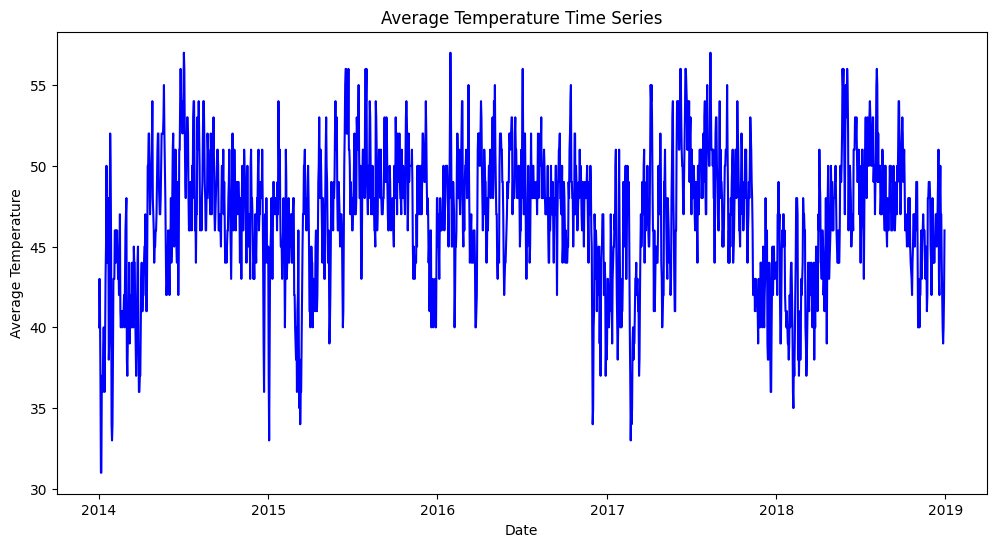

In [141]:
# Visualizing/Plotting the Time Series Data
plt.figure(figsize=(12, 6))
plt.plot(ts, color='blue')
plt.title('Average Temperature Time Series')
plt.xlabel('Date')
plt.ylabel('Average Temperature')
plt.show()

### **Checking if the time series data is stationary or not**
* Augmented Dickey Fuller Test (ADF Test)
  * If p <= 0.05; Data is *Stationary*
  * If p > 0.05; Data is *Non-Stationary*
  - [Then make it stationary by *Differencing*]

In [142]:
from statsmodels.tsa.stattools import adfuller

def adf_test(dataset):
  dftest = adfuller(dataset, autolag = 'AIC')
  print("1. ADF : ",dftest[0])
  print("2. P-Value : ", dftest[1])
  print("3. Num Of Lags : ", dftest[2])
  print("4. Num Of Observations Used For ADF Regression and Critical Values Calculation :", dftest[3])
  print("5. Critical Values :")
  for key, val in dftest[4].items():
      print("\t",key, ": ", val)

adf_test(df['AvgTemp'])

1. ADF :  -6.554680125068777
2. P-Value :  8.675937480199653e-09
3. Num Of Lags :  12
4. Num Of Observations Used For ADF Regression and Critical Values Calculation : 1808
5. Critical Values :
	 1% :  -3.433972018026501
	 5% :  -2.8631399192826676
	 10% :  -2.5676217442756872


Here, p-value <= 0.05. Hence, the data is stationary. So no need of Differencing.

### **Constructing the ARIMA Model**

**Importing Necessary Package & Library**

In [143]:
pip install pmdarima

In [144]:
from pmdarima import auto_arima
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima.model import ARIMA

**Order of the AR, I, MA parts which are donated by (p,d,q) respectively.**
* p: The order of the AutoRegressive (AR) component
* d: The degree of differencing required to make the time series stationary
* q: The order of the Moving Average (MA) component,

In [145]:
stepwise_fit = auto_arima(df['AvgTemp'], suppress_warnings=True)
stepwise_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                 1821
Model:               SARIMAX(1, 0, 5)   Log Likelihood               -4139.517
Date:                Mon, 25 Mar 2024   AIC                           8295.034
Time:                        16:26:50   BIC                           8339.092
Sample:                             0   HQIC                          8311.288
                               - 1821                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      1.2070      0.362      3.335      0.001       0.498       1.916
ar.L1          0.9739      0.008    124.621      0.000       0.959       0.989
ma.L1         -0.1246      0.024     -5.256      0.000      -0.171      -0.078
ma.L2         -0.2196      0.024     -9.115      0.000      -0.267      -0.172
ma.L3         -0.2056      0.024     -8.615      0.000      -0.252      -0.159
ma.L4         -0.1373      0.023     -6.034      0.000      -0.182      -0.093
ma.L5         -0.0476      0.024     -1.952      0.051      -0.095       0.000
sigma2         5.4981      0.172     31.952      0.000       5.161       5.835
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                20.20
Prob(Q):                              0.95   Prob(JB):                         0.00
Heteroskedasticity (H):               0.81   Skew:                            -0.17
Prob(H) (two-sided):                  0.01   Kurtosis:                         3.39
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

### **Splitting Data into Training and Testing**

In [159]:
from statsmodels.tsa.arima_model import ARIMA

In [160]:
print(df.shape)
train=df.iloc[:-30]
test=df.iloc[-30:]
print(train.shape,test.shape)
print(test.iloc[0],test.iloc[-1])

(1821, 6)
(1791, 6) (30, 6)
DATE       2018-12-01 00:00:00
MinTemp                   36.0
MaxTemp                   52.0
AvgTemp                   44.0
Sunrise                    640
Sunset                    1743
Name: 1795, dtype: object DATE       2018-12-30 00:00:00
MinTemp                   39.0
MaxTemp                   52.0
AvgTemp                   46.0
Sunrise                    656
Sunset                    1754
Name: 1824, dtype: object


### **Training the Model**

In [161]:
from statsmodels.tsa.arima.model import ARIMA
model = ARIMA(train['AvgTemp'], order=(1, 0, 5))
model = model.fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                AvgTemp   No. Observations:                 1791
Model:                 ARIMA(1, 0, 5)   Log Likelihood               -4070.198
Date:                Mon, 25 Mar 2024   AIC                           8156.395
Time:                        16:36:23   BIC                           8200.320
Sample:                             0   HQIC                          8172.614
                               - 1791                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         46.5856      0.758     61.454      0.000      45.100      48.071
ar.L1          0.9856      0.005    188.230      0.000       0.975       0.996
ma.L1         -0.1412      0.023     -6.124      0.000      -0.186      -0.096
ma.L2         -0.2268      0.024     -9.635      0.000      -0.273      -0.181
ma.L3         -0.2168      0.023     -9.251      0.000      -0.263      -0.171
ma.L4         -0.1479      0.023     -6.491      0.000      -0.193      -0.103
ma.L5         -0.0595      0.024     -2.438      0.015      -0.107      -0.012
sigma2         5.5093      0.174     31.624      0.000       5.168       5.851
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                14.88
Prob(Q):                              0.97   Prob(JB):                         0.00
Heteroskedasticity (H):               0.82   Skew:                            -0.15
Prob(H) (two-sided):                  0.01   Kurtosis:                         3.33
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

### **Making Predictions on Test Set**

In [172]:
test['AvgTemp'].mean()

45.0

In [173]:
from sklearn.metrics import mean_squared_error
from math import sqrt
rmse=sqrt(mean_squared_error(pred,test['AvgTemp']))
print(rmse)

3.000463825206671


In [174]:
model2=ARIMA(df['AvgTemp'],order=(1,0,5))
model2=model2.fit()
df.tail()

,DATE,MinTemp,MaxTemp,AvgTemp,Sunrise,Sunset
1820,2018-12-26,35.0,45.0,40.0,654,1752
1821,2018-12-27,33.0,44.0,39.0,655,1752
1822,2018-12-28,33.0,47.0,40.0,655,1753
1823,2018-12-29,36.0,47.0,42.0,655,1753
1824,2018-12-30,39.0,52.0,46.0,656,1754


### **Predicting Future Dates**

In [175]:
index_future_dates=pd.date_range(start='2018-12-30',end='2019-01-29')
#print(index_future_dates)
pred=model2.predict(start=len(df),end=len(df)+30,typ='levels').rename('ARIMA Predictions')
#print(comp_pred)
pred.index=index_future_dates
print(pred)

2018-12-30    46.418166
2018-12-31    46.113912
2019-01-01    45.617874
2019-01-02    45.249566
2019-01-03    45.116916
2019-01-04    45.136666
2019-01-05    45.156140
2019-01-06    45.175341
2019-01-07    45.194274
2019-01-08    45.212942
2019-01-09    45.231349
2019-01-10    45.249498
2019-01-11    45.267394
2019-01-12    45.285038
2019-01-13    45.302436
2019-01-14    45.319591
2019-01-15    45.336505
2019-01-16    45.353183
2019-01-17    45.369628
2019-01-18    45.385842
2019-01-19    45.401830
2019-01-20    45.417593
2019-01-21    45.433137
2019-01-22    45.448462
2019-01-23    45.463574
2019-01-24    45.478474
2019-01-25    45.493165
2019-01-26    45.507651
2019-01-27    45.521934
2019-01-28    45.536017
2019-01-29    45.549904
Freq: D, Name: ARIMA Predictions, dtype: float64


<Axes: >

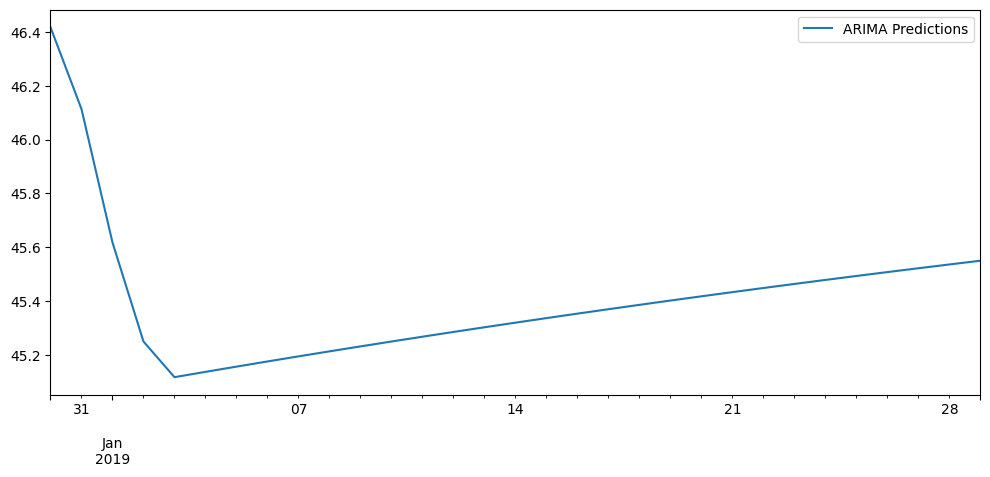

In [176]:
pred.plot(figsize=(12,5),legend=True)